# Charity Funding Predictor
Jack Cohen

## Preprocessing

In [35]:
# Import our dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [36]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)

In [37]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [38]:
# Look at APPLICATION_TYPE value counts for binning.
appTypeCounts = application_df["APPLICATION_TYPE"].value_counts()
appTypeCounts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [39]:
# Choose a cutoff value and create a list of application types to be replaced.
# Use the variable name `application_types_to_replace`.
application_types_to_replace = appTypeCounts.loc[appTypeCounts < 200].index

# Replace in dataframe.
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful.
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [40]:
# Look at CLASSIFICATION value counts for binning.
classificationTypeCounts = application_df["CLASSIFICATION"].value_counts()
classificationTypeCounts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C6100        1
C1570        1
C5200        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [41]:
# You may find it helpful to look at CLASSIFICATION value counts >1.
classificationTypeCounts.loc[classificationTypeCounts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C1720        6
C4100        6
C2400        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C1267        2
C3200        2
C1234        2
C1256        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [42]:
# Choose a cutoff value and create a list of classifications to be replaced.
# Use the variable name `classifications_to_replace`.
classifications_to_replace = classificationTypeCounts.loc[classificationTypeCounts < 1000].index

# Replace in dataframe.
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful.
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [43]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [44]:
# Convert categorical data to numeric with `pd.get_dummies`.
application_df['SPECIAL_CONSIDERATIONS'] = LabelEncoder().fit_transform(application_df['SPECIAL_CONSIDERATIONS'])
application_df = pd.get_dummies(application_df)
application_df.head()


,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# Split our preprocessed data into our features and target arrays.
target = application_df['IS_SUCCESSFUL']
features = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [46]:
# Create a StandardScaler instances.
scaler = StandardScaler()

# Fit the StandardScaler.
X_scaler = scaler.fit(X_train)

# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer.
nn_model.add(tf.keras.layers.Dense(units=8, activation="relu", input_dim=42))

# Second hidden layer.
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer.
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model.
nn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 344       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model.
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [49]:
# Train the model.
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
25724/25724 [==============================] - 1s 23us/sample - loss: 0.6212 - acc: 0.6775
Epoch 2/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5753 - acc: 0.7186
Epoch 3/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5666 - acc: 0.7225
Epoch 4/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5599 - acc: 0.7257
Epoch 5/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5579 - acc: 0.7275
Epoch 6/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5569 - acc: 0.7253
Epoch 7/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5560 - acc: 0.7278
Epoch 8/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5552 - acc: 0.7274
Epoch 9/100
25724/25724 [==============================] - 0s 19us/sample - loss: 0.5544 - acc: 0.7277
Epoch 10/100
25724/25724 [==============================] - 1s 20us/sampl

25724/25724 [==============================] - 1s 20us/sample - loss: 0.5471 - acc: 0.7340
Epoch 80/100
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5472 - acc: 0.7343
Epoch 81/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5467 - acc: 0.7334
Epoch 82/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5467 - acc: 0.7340
Epoch 83/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5467 - acc: 0.7338
Epoch 84/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5466 - acc: 0.7343
Epoch 85/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5465 - acc: 0.7321
Epoch 86/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5467 - acc: 0.7333
Epoch 87/100
25724/25724 [==============================] - 1s 20us/sample - loss: 0.5465 - acc: 0.7339
Epoch 88/100
25724/25724 [==============================] - 1s 20us/sample - 

In [50]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5556 - acc: 0.7278
Loss: 0.5556151312607023, Accuracy: 0.7278134226799011


In [51]:
# Export our model to HDF5 file.
nn_model.save('AlphabetSoupCharity.h5')

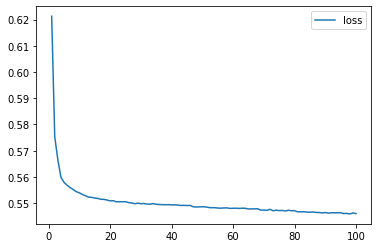

In [52]:
# Create a DataFrame containing training history.
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs.
history_df.index += 1

# Plot the loss.
history_df.plot(y="loss");

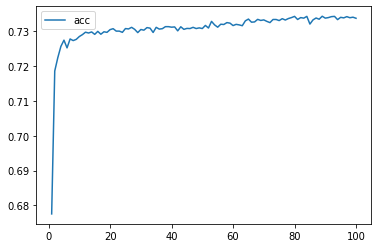

In [55]:
# Plot the accuracy.
history_df.plot(y="acc");